In [45]:
import tweepy
from textblob import TextBlob
import jsonpickle
import pandas as pd
import json

In [46]:
CONSUMER_KEY = 'PPPf5yN6lgV0K6O4hsk3Txd8Q'
CONSUMER_SECRET = 'Xdl3rSNSR1ezS4LR4MzyPoHfeF3pLOP1ljCXywbjxJIzS1LO7B'
ACCESS_KEY = '418830178-LlHhELwV9Xfs4aJhh16Ri6QF6ZcdCwIJHnORzDq1'
ACCESS_SECRET = 'ZbJJNsANCmH5BrYhfGw3oObtYFqRsMic1gbFVu7RsXxee'


auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
auth.secure = True
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [47]:
searchQuery = 'DeWine'
retweet_filter='-filter:retweets'

q=searchQuery+retweet_filter
tweetsPerQry = 100
fName = 'tweets.txt'
sinceId = None

In [110]:
max_id = -1
maxTweets = 1000

tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        tweets = []
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry, tweet_mode='extended')

                else:
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        since_id=sinceId, tweet_mode='extended')
            else:
                if (not sinceId):
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        max_id=str(max_id - 1), tweet_mode='extended')
                else:
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        max_id=str(max_id - 1),
                                        since_id=sinceId, tweet_mode='extended')

            if not new_tweets:
                print("No more tweets found")
                break
            for tweet in new_tweets:
                f.write(str(tweet.full_text.replace('\n','').encode("utf-8"))+"\n")

            tweetCount += len(new_tweets)
            print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
                
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break
                
print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))


Downloaded 89 tweets
Downloaded 167 tweets
Downloaded 253 tweets
Downloaded 347 tweets
Downloaded 441 tweets
Downloaded 539 tweets
Downloaded 639 tweets
Downloaded 721 tweets
Downloaded 798 tweets
Downloaded 875 tweets
Downloaded 953 tweets
Downloaded 1031 tweets
Downloaded 1031 tweets, Saved to tweets.txt


In [48]:
import re

def clean(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'@[A-Za-z0–9]+', '', tweet) 
    return tweet

def read_tweets(file_name):
    with open(file_name, 'r') as f:
        tweets = [clean(line.strip()) for line in f]
    f.close()
    return tweets

In [49]:
tweets = read_tweets(fName)
print(tweets[2])
print(TextBlob(tweets[2]).sentiment)

Ohio Gov Mike DeWine First batch of COVID-19 vaccine coming mid-December httpstcovRg86bITkk SmartNews
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)


In [6]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [7]:
import numpy as np

tweet_polarity = np.zeros(len(tweets))
tweet_subjectivity = np.zeros(len(tweets))

for idx, tweet in enumerate(tweets):
    tweet_polarity[idx] = polarity(tweet)
    tweet_subjectivity[idx] = subjectivity(tweet)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

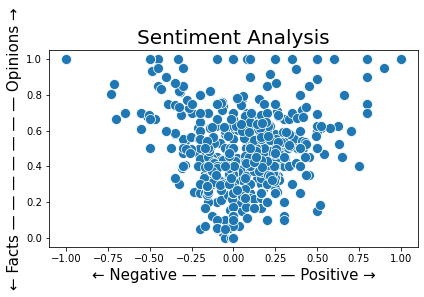

In [9]:
sns.scatterplot(tweet_polarity, # X-axis
                tweet_subjectivity,  # Y-axis
                s=100);


plt.title("Sentiment Analysis", fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.tight_layout()

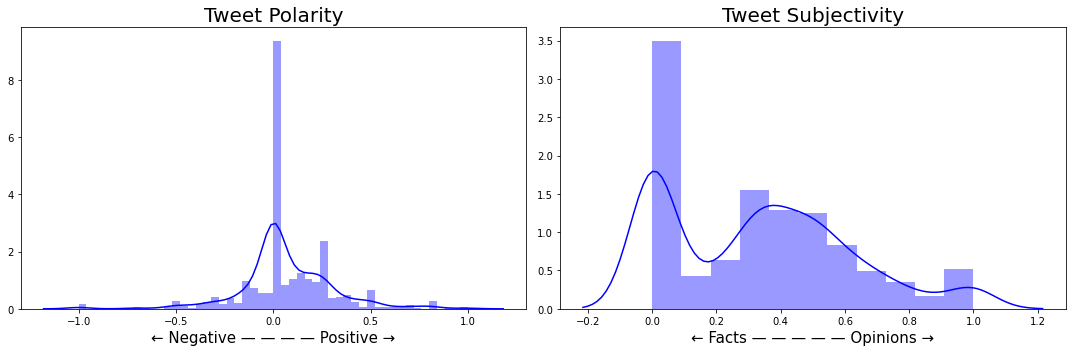

In [10]:
f, axs = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(tweet_polarity, color="b", ax=axs[0])
axs[0].set_title("Tweet Polarity", fontsize = 20)
axs[0].set_xlabel('← Negative — — — — Positive →', fontsize=15)
sns.distplot(tweet_subjectivity, color="b", ax=axs[1])
axs[1].set_title("Tweet Subjectivity", fontsize = 20)
axs[1].set_xlabel('← Facts — — — — — Opinions →', fontsize=15)

plt.tight_layout()


In [50]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Justin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Justin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in tweets:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['charliekirk11', 'DeWine', 'is', 'a', 'republicanIn', 'fact', 'a', 'lot', 'of', 'the', 'Republican', 'Governors', 'are', 'calling', 'for', 'a', 'different', 'thanksgiving', 'ohio', 'is', 'having', 'a', 'cow', 'about', 'dewine', 'not', 'wanting', 'fans', 'at', 'winter', 'sports', 'when', 'the', 'bowling', 'alleys', 'didnxe2x80x99t', 'even', 'get', 'the', 'chance', 'to', 'have', 'them', 'in', 'the', 'first', 'place', '(yes', 'some', 'do', 'but', 'a', 'lot', 'of', 'small', 'alleys', 'like', 'carroll', 'lanes', 'minerva', 'bowl', 'and', 'forrest', 'lanes', 'have', 'no', 'spectators', 'Ohio', 'Gov', 'Mike', 'DeWine', 'First', 'batch', 'of', 'COVID-19', 'vaccine', 'coming', 'mid-December', 'httpstcovRg86bITkk', 'SmartNews', 'Canxe2x80x99t', 'imagine', 'DeWine', 'in', 'a', 'state', 'that', 'just', 'went', 'by', '8', 'to', 'Trump', 'would', 'dare', 'veto', 'the', 'bill', 'But', 'Ixe2x80x99ve', 'been', 'surprised', 'before', 'httpstcoH5U5zjr5Tl', 'I', 'wonder', 'what', 'Dewine', 'thinks', 'of'

In [52]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [53]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['charliekirk11',
 'dewin',
 'is',
 'a',
 'republicanin',
 'fact',
 'a',
 'lot',
 'of',
 'the',
 'republican',
 'governor',
 'are',
 'call',
 'for',
 'a',
 'differ',
 'thanksgiv',
 'ohio',
 'is',
 'have',
 'a',
 'cow',
 'about',
 'dewin',
 'not',
 'want',
 'fan',
 'at',
 'winter',
 'sport',
 'when',
 'the',
 'bowl',
 'alley',
 'didnxe2x80x99t',
 'even',
 'get',
 'the',
 'chanc',
 'to',
 'have',
 'them',
 'in',
 'the',
 'first',
 'place',
 'yes',
 'some',
 'do',
 'but',
 'a',
 'lot',
 'of',
 'small',
 'alley',
 'like',
 'carrol',
 'lane',
 'minerva',
 'bowl',
 'and',
 'forrest',
 'lane',
 'have',
 'no',
 'spectat',
 'ohio',
 'gov',
 'mike',
 'dewin',
 'first',
 'batch',
 'of',
 'covid19',
 'vaccin',
 'come',
 'middecemb',
 'httpstcovrg86bitkk',
 'smartnew',
 'canxe2x80x99t',
 'imagin',
 'dewin',
 'in',
 'a',
 'state',
 'that',
 'just',
 'went',
 'by',
 '8',
 'to',
 'trump',
 'would',
 'dare',
 'veto',
 'the',
 'bill',
 'but',
 'ixe2x80x99v',
 'been',
 'surpris',
 'befor',
 'httpstcoh5u5

In [54]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['charliekirk11',
 'dewin',
 'republicanin',
 'fact',
 'lot',
 'republican',
 'governor',
 'differ',
 'thanksgiv',
 'ohio',
 'cow',
 'dewin',
 'want',
 'fan',
 'winter',
 'sport',
 'bowl',
 'alley',
 'didnxe2x80x99t',
 'chanc',
 'place',
 'yes',
 'lot',
 'small',
 'alley',
 'like',
 'carrol',
 'lane',
 'minerva',
 'bowl',
 'forrest',
 'lane',
 'spectat',
 'ohio',
 'gov',
 'mike',
 'dewin',
 'batch',
 'covid19',
 'vaccin',
 'come',
 'middecemb',
 'httpstcovrg86bitkk',
 'smartnew',
 'canxe2x80x99t',
 'imagin',
 'dewin',
 'state',
 'went',
 '8',
 'trump',
 'dare',
 'veto',
 'bill',
 'ixe2x80x99v',
 'surpris',
 'befor',
 'httpstcoh5u5zjr5tl',
 'wonder',
 'dewin',
 'think',
 'meme',
 'xf0x9fx98x82',
 'coronavirus',
 'vaccin',
 'shipment',
 'ohio',
 'arriv',
 'dec',
 '15',
 'dewin',
 'httpstco0tcbsxkxhj',
 'httpstcowlnvabtmnv',
 'xe2x9axa0xe2x9axa0th',
 'lawyer',
 'need',
 'look',
 'govmikedewin',
 'mikedewin',
 'ltgovhust',
 'ohio',
 'bought',
 'ton',
 'mask',
 'china',
 'start',
 'abund',


In [57]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [58]:
from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 2524, 2: 507, 3: 247, 4: 136, 5: 90, 6: 77, 7: 59, 8: 41, 10: 29, 9: 25, ...})

In [59]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

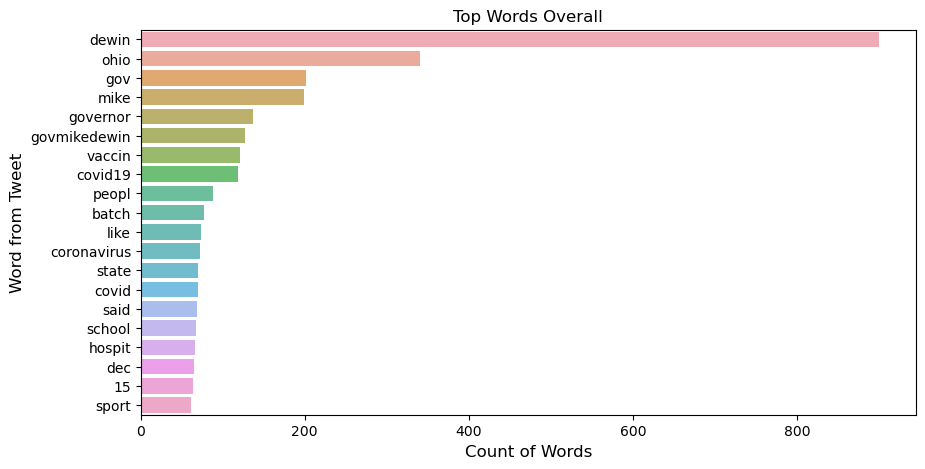

In [60]:
df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [61]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [62]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [63]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

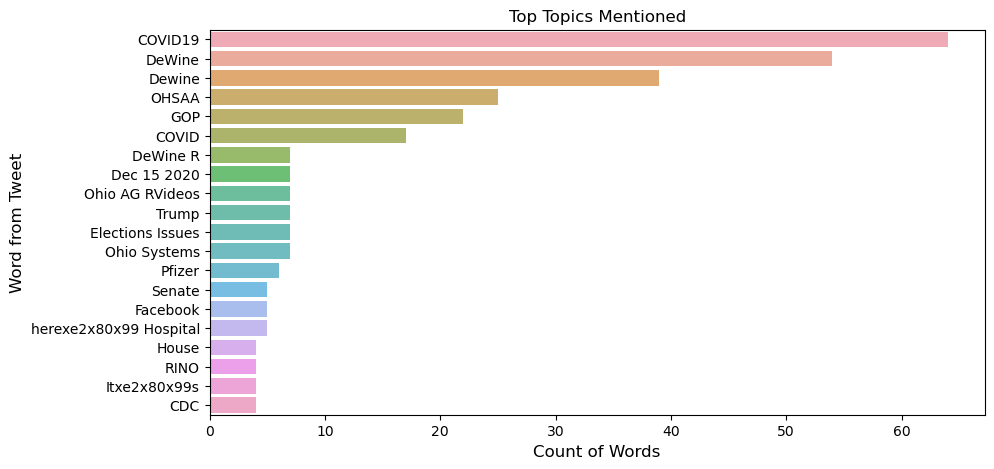

In [67]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Topics Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [65]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

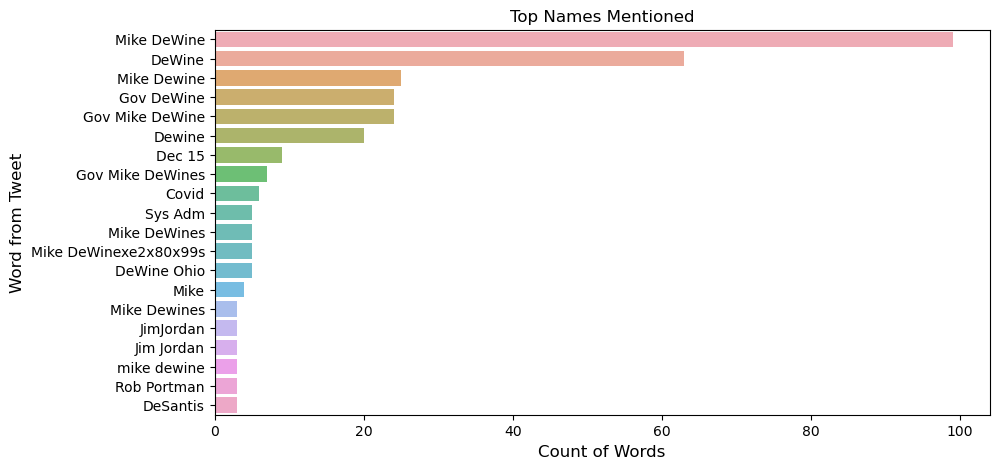

In [68]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Names Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()